# Сокращение размерности

В каждом из заданий:
* Обучите два классификатора (svm и огистическую регрессию на датасете данном ниже) в датасете размерность из 30 признаков
* Попребирайте различное количество итоговых размерностей и постройте графики качества от количества размерностей. Выведите обе модели на одном графике в каждой заадче

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import decomposition
from sklearn import datasets
from sklearn import svm
from sklearn.linear_model import LogisticRegression
np.random.seed(5)
dataset = datasets.load_breast_cancer()
X = dataset.data
y = dataset.target

# Forward selection (2pts)

Лучшие результаты:
SVM: 0.9824
Логистическая регрессия: 0.9824


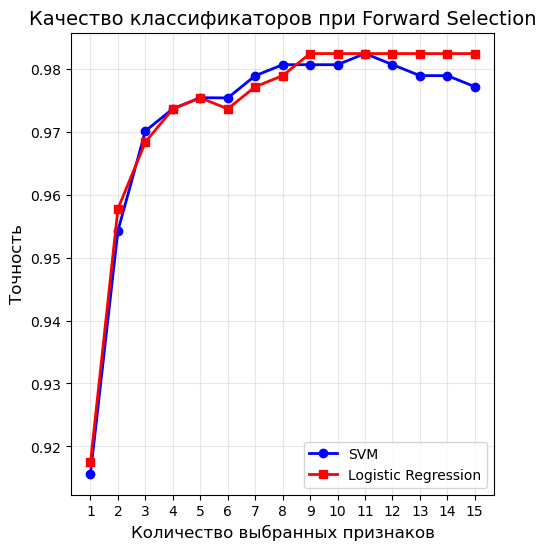

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import decomposition
from sklearn import datasets
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
import warnings

np.random.seed(5)

dataset = datasets.load_breast_cancer()
X = dataset.data
y = dataset.target


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


def forward_selection(X, y, model, max_features=30):
    n_features = X.shape[1]
    selected_features = []
    scores = []
    
    remaining_features = list(range(n_features))
    
    for i in range(1, min(max_features, n_features) + 1):
        best_score = -1
        best_feature = None
        
        for feature in remaining_features:
            current_features = selected_features + [feature]
            X_subset = X[:, current_features]
            score = np.mean(cross_val_score(model, X_subset, y, cv=5, scoring='accuracy'))
            
            if score > best_score:
                best_score = score
                best_feature = feature
        
        selected_features.append(best_feature)
        remaining_features.remove(best_feature)
        scores.append(best_score)
        
    
    return selected_features, scores


svm_model = svm.SVC(kernel='linear', random_state=5)
lr_model = LogisticRegression(random_state=5, max_iter=1000)


svm_features, svm_scores = forward_selection(X_scaled, y, svm_model, max_features=15)


lr_features, lr_scores = forward_selection(X_scaled, y, lr_model, max_features=15)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(range(1, len(svm_scores) + 1), svm_scores, 'b-o', linewidth=2, markersize=6, label='SVM')
plt.plot(range(1, len(lr_scores) + 1), lr_scores, 'r-s', linewidth=2, markersize=6, label='Logistic Regression')
plt.xlabel('Количество выбранных признаков', fontsize=12)
plt.ylabel('Точность', fontsize=12)
plt.title('Качество классификаторов при Forward Selection', fontsize=14)
plt.grid(True, alpha=0.3)
plt.legend()
plt.xticks(range(1, max(len(svm_scores), len(lr_scores)) + 1))

best_svm_idx = np.argmax(svm_scores)
best_lr_idx = np.argmax(lr_scores)

print('Лучшие результаты:')
print('SVM:', round(svm_scores[best_svm_idx], 4))
print('Логистическая регрессия:', round(lr_scores[best_lr_idx], 4))



# Backward elimination (2pts)

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
import warnings

np.random.seed(5)


dataset = datasets.load_breast_cancer()
X = dataset.data
y = dataset.target


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


def backward_elimination(X, y, model, min_features=1):

    n_features = X.shape[1]
    current_features = list(range(n_features))
    scores = []
    
    X_current = X[:, current_features]
    initial_score = np.mean(cross_val_score(model, X_current, y, cv=5, scoring='accuracy'))
    scores.append(initial_score)
    
    while len(current_features) > min_features:
        best_score = -1
        best_feature = None
        best_features_set = None
        
        for feature in current_features:
            features_to_try = current_features.copy()
            features_to_try.remove(feature)
            X_subset = X[:, features_to_try]
            
            score = np.mean(cross_val_score(model, X_subset, y, cv=5, scoring='accuracy'))
            

            if score > best_score:
                best_score = score
                best_feature = feature
                best_features_set = features_to_try.copy()
        

        if best_feature is not None:
            current_features = best_features_set
            scores.append(best_score)
    
    return list(range(n_features, min_features-1, -1)), scores


svm_model = svm.SVC(kernel='linear', random_state=5)
lr_model = LogisticRegression(random_state=5, max_iter=1000)


svm_dimensions, svm_scores = backward_elimination(X_scaled, y, svm_model, min_features=1)

lr_dimensions, lr_scores = backward_elimination(X_scaled, y, lr_model, min_features=1)


plt.figure(figsize=(10, 8))



plt.plot(svm_dimensions, svm_scores, 'b-o', linewidth=2, markersize=6, label='SVM')
plt.plot(lr_dimensions[:len(lr_scores)], lr_scores, 'r-s', linewidth=2, markersize=6, label='Logistic Regression')
plt.xlabel('Количество оставшихся признаков', fontsize=12)
plt.ylabel('Точность (accuracy)', fontsize=12)
plt.title('Backward Elimination: Качество vs Количество признаков', fontsize=14)
plt.grid(True, alpha=0.3)
plt.legend()
plt.gca().invert_xaxis()



best_svm_idx = np.argmax(svm_scores)
best_lr_idx = np.argmax(lr_scores)

print('Backward Elimination - Лучшие результаты:')
print('SVM:', round(svm_scores[best_svm_idx],4))
print('Логистическая регрессия:', round(lr_scores[best_lr_idx],4))




KeyboardInterrupt



# PCA (2 pts)


### EM алгоритм

Оставлю это тут просто чтобы пугать людей


$$
\log p(x|\theta) = \int q(z)\log p(x|\theta)dz = \int q(z)\log\dfrac{p(x,z|\theta)}{p(z|x,\theta)}dz = \int q(z)\log\dfrac{p(x,z|\theta)}{q(z)}dz+\int q(z)\log\dfrac{q(z)}{p(z|x,\theta)}dz = \mathcal{L}(q,\theta)+KL(q(z)|p(z|x,\theta))
$$

** E-step **
$$ q(z)^{(n+1)} = p(z|x,\theta^{(n)}) $$
** M-step **
$$ \theta^{(n+1)} = \max\limits_{\theta} \mathcal{L}(q^{(n+1)},\theta) $$

Обучите два классификатора (svm и огистическую регрессию на датасете данном ниже) в датасете размерность из 30 признаков. Попребирайте различное количество итоговых размерностей (до которых будет сокращать PCA) и постройте графики для обоих классификаторов. Сделайте выводы.

ЛУЧШИЕ РЕЗУЛЬТАТЫ:
SVM: 0.9789 с 9 компонентами PCA
LR: 0.9807 с 25 компонентами PCA


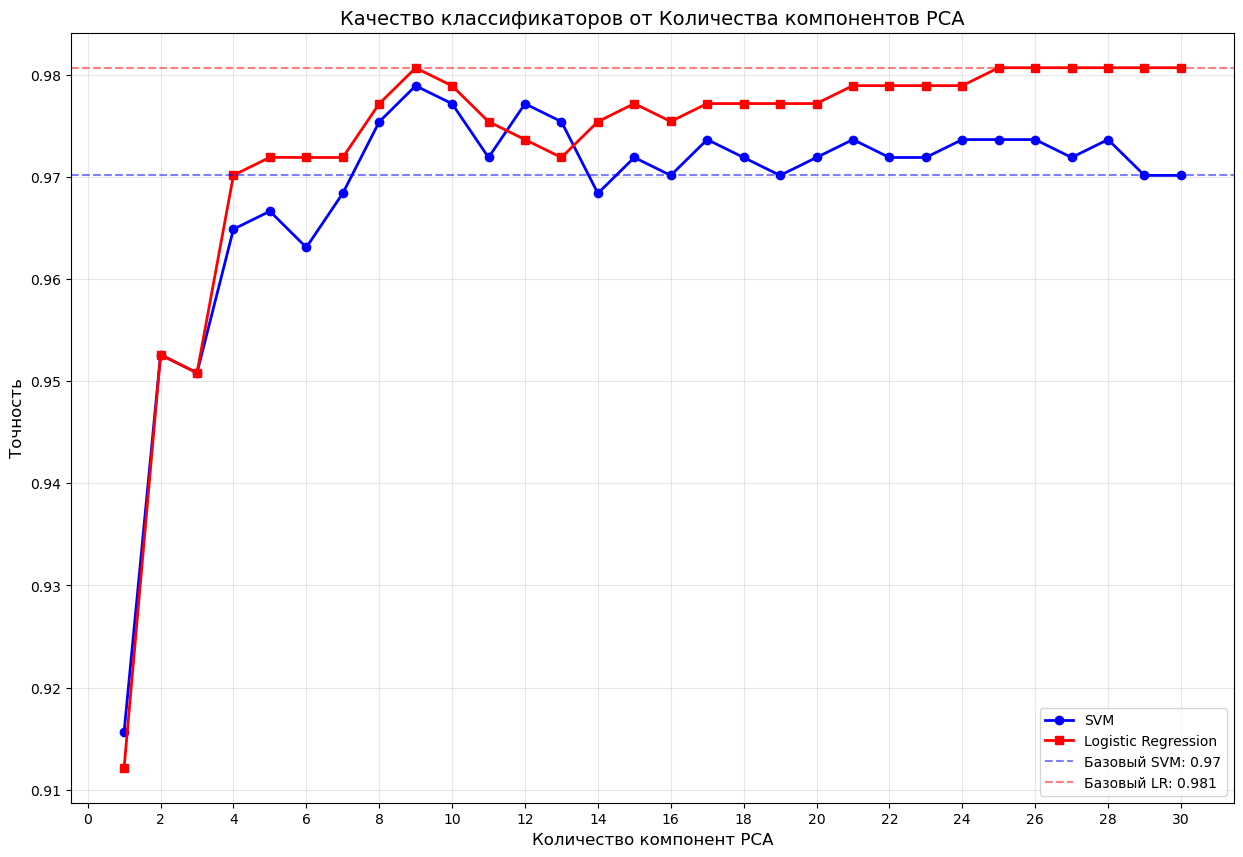

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import decomposition
from sklearn import datasets
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
import warnings


np.random.seed(5)
dataset = datasets.load_breast_cancer()
X = dataset.data
y = dataset.target
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
svm_model = svm.SVC(kernel='linear', random_state=5)
lr_model = LogisticRegression(random_state=5, max_iter=1000)
n_components_range = list(range(1, 31))
svm_scores = []
lr_scores = []
explained_variances = []
for n_components in n_components_range:
    pca = decomposition.PCA(n_components=n_components)
    pca.fit(X_scaled)
    X_pca = pca.transform(X_scaled)
    explained_variance = np.sum(pca.explained_variance_ratio_)
    explained_variances.append(explained_variance)
    svm_score = np.mean(cross_val_score(svm_model, X_pca, y, cv=5, scoring='accuracy'))
    svm_scores.append(svm_score)
    lr_score = np.mean(cross_val_score(lr_model, X_pca, y, cv=5, scoring='accuracy'))
    lr_scores.append(lr_score)


plt.figure(figsize=(15, 10))



plt.plot(n_components_range, svm_scores, 'b-o', linewidth=2, markersize=6, label='SVM')
plt.plot(n_components_range, lr_scores, 'r-s', linewidth=2, markersize=6, label='Logistic Regression')
plt.xlabel('Количество компонент PCA', fontsize=12)
plt.ylabel('Точность', fontsize=12)
plt.title('Качество классификаторов от Количества компонентов PCA', fontsize=14)
plt.grid(True, alpha=0.3)
plt.legend()
plt.xticks(range(0, 31, 2))


baseline_svm = np.mean(cross_val_score(svm_model, X_scaled, y, cv=5, scoring='accuracy'))
baseline_lr = np.mean(cross_val_score(lr_model, X_scaled, y, cv=5, scoring='accuracy'))
plt.axhline(y=baseline_svm, color='blue', linestyle='--', alpha=0.5, label=f'Базовый SVM: {round(baseline_svm, 3)}')
plt.axhline(y=baseline_lr, color='red', linestyle='--', alpha=0.5, label=f'Базовый LR: {round(baseline_lr,3)}')
plt.legend()

print('ЛУЧШИЕ РЕЗУЛЬТАТЫ:')
print(f"SVM: {round(svm_scores[best_svm_idx],4)} с {best_svm_components} компонентами PCA")
print(f"LR: {round(lr_scores[best_lr_idx],4)} с {best_lr_components} компонентами PCA")




#  Выводы (1pts)